In [1]:
import pandas as pd
import numpy as np

In [2]:
city_data = pd.read_csv("E:\SIG_23\SEM-3\Spatial Modeling\AQI_city_day.csv")
city_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
city_name = city_data['City'].unique()
print(city_name)

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [4]:
# Check if there are still any missing values
print(city_data.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


### Data Cleaning 

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AQI_city_day.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Sort by Date for each city
data = data.sort_values(['City', 'Date']).reset_index(drop=True)

# Define the columns with pollutants and AQI
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Group by 'City' and forward-fill, then backward-fill missing values within each group
data[pollutant_columns] = data.groupby('City')[pollutant_columns].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Drop any remaining rows with NaN in the 'AQI' column (if any)
data = data.dropna(subset=['AQI']).reset_index(drop=True)

# Check if there are still any missing values
print(data.isnull().sum())


City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI               0
AQI_Bucket     4681
dtype: int64


C:\Users\vibho\AppData\Local\Temp\ipykernel_8592\2407946113.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[pollutant_columns] = data.groupby('City')[pollutant_columns].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\vibho\AppData\Local\Temp\ipykernel_8592\2407946113.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[pollutant_columns] = data.groupby('City')[pollutant_columns].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [6]:
# Filling missing numerical columns with average values
numeric_columns = city_data.select_dtypes(include=[np.number]).columns
city_data[numeric_columns] = city_data[numeric_columns].fillna(city_data[numeric_columns].mean())
city_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,NaN
1,Ahmedabad,02-01-2015,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,NaN
2,Ahmedabad,03-01-2015,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,NaN
3,Ahmedabad,04-01-2015,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,NaN
4,Ahmedabad,05-01-2015,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,NaN


In [8]:
# Fill in missing values for column AQI_Bucket using mode (most common value)
city_data['AQI_Bucket'] = city_data['AQI_Bucket'].fillna(city_data['AQI_Bucket'].mode()[0])
city_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
1,Ahmedabad,02-01-2015,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2,Ahmedabad,03-01-2015,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
3,Ahmedabad,04-01-2015,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
4,Ahmedabad,05-01-2015,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate


In [9]:
# Select input variables (features) and target variables (target)
x_var = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
y_var = ['AQI_Bucket']
city_data[x_var + y_var]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI_Bucket
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,Moderate
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,Moderate
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,Moderate
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,Moderate
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,Moderate
...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,Good
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,Satisfactory
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,Satisfactory
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,Satisfactory


In [10]:
# LSTM Model

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'city_data' is your DataFrame after preprocessing

# Encode the AQI_Bucket column if it's categorical (classification task)
label_encoder = LabelEncoder()
city_data['AQI_Bucket'] = label_encoder.fit_transform(city_data['AQI_Bucket'])

# Scale features to range [0,1]
scaler = MinMaxScaler()
city_data[x_var] = scaler.fit_transform(city_data[x_var])

# Prepare data for LSTM
# We need to reshape the input to 3D: [samples, timesteps, features]
X = np.array(city_data[x_var])
y = np.array(city_data['AQI_Bucket'])  # Use AQI for regression or AQI_Bucket for classification
X = X.reshape((X.shape[0], 1, X.shape[1]))  # Reshape for LSTM

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(1))  # Adjust output for regression or use a different layer for classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse' if y.ndim == 1 else 'binary_crossentropy')  # Adjust loss for regression/classification

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict
y_pred = lstm_model.predict(X_test)
print (y_pred)

Epoch 1/50
739/739 [==============================] - 6s 6ms/step - loss: 2.4167 - val_loss: 1.5649
Epoch 2/50
739/739 [==============================] - 4s 5ms/step - loss: 1.5273 - val_loss: 1.4573
Epoch 3/50
739/739 [==============================] - 4s 5ms/step - loss: 1.4749 - val_loss: 1.4288
Epoch 4/50
739/739 [==============================] - 4s 6ms/step - loss: 1.4501 - val_loss: 1.4101
Epoch 5/50
739/739 [==============================] - 4s 5ms/step - loss: 1.4268 - val_loss: 1.3926
Epoch 6/50
739/739 [==============================] - 4s 5ms/step - loss: 1.4077 - val_loss: 1.3818
Epoch 7/50
739/739 [==============================] - 4s 5ms/step - loss: 1.3938 - val_loss: 1.3721
Epoch 8/50
739/739 [==============================] - 2s 3ms/step - loss: 1.3846 - val_loss: 1.3607
Epoch 9/50
739/739 [==============================] - 3s 4ms/step - loss: 1.3774 - val_loss: 1.3530
Epoch 10/50
739/739 [==============================] - 4s 5ms/step - loss: 1.3680 - val_loss: 1.3467

In [37]:
# Convert X_test to a NumPy array
X_test_array = X_test.to_numpy()

# Reshape X_test_array to 3D for LSTM: (samples, timesteps, features)
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Calculate predictions on the reshaped test set
y_pred = lstm_model.predict(X_test_reshaped)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


185/185 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 0.9049007705488231


In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'city_data' is your DataFrame after preprocessing

# Encode the AQI_Bucket column if it's categorical (for classification task)
label_encoder = LabelEncoder()
city_data['AQI_Bucket'] = label_encoder.fit_transform(city_data['AQI_Bucket'])

# Split data into features (X) and target (y)
X = city_data[x_var]
y = city_data['AQI_Bucket']  # For classification or regression

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(label_encoder.classes_))  # For classification
# xgboost_model = xgb.XGBRegressor(objective="reg:squarederror")  # For regression

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
if xgboost_model.__class__.__name__ == "XGBClassifier":
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
else:
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Accuracy: 0.8180125275097342
Mean Squared Error: 0.8144574233959709
Root Mean Squared Error (RMSE): 0.9024729488444354


In [39]:
# Saving the Trained Model
from tensorflow.keras.models import save_model, load_model

# Save the LSTM model
lstm_model.save("lstm_model.h5")  # Saves in HDF5 format

# Later, to load the saved model
lstm_model = load_model("lstm_model.h5")


In [40]:
import xgboost as xgb

# Save the XGBoost model
xgboost_model.save_model("xgboost_model.h5")  # Saves in JSON format

# Later, to load the saved model
xgb_model = xgb.Booster()
xgb_model.load_model("xgboost_model.h5")


C:\Users\vibho\anaconda3\envs\VB\lib\site-packages\xgboost\core.py:158: UserWarning: [21:18:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [30]:
# try AQI 

In [32]:
import pandas as pd

# Load the dataset
city_pollution_data = pd.read_csv("E:\SIG_23\SEM-3\Spatial Modeling\city_pollutant_data.csv")

# Define AQI breakpoints for PM2.5 and PM10
pm25_breakpoints = [
    (0, 30, 0, 50),     # Good
    (31, 60, 51, 100),  # Satisfactory
    (61, 90, 101, 200), # Moderate
    (91, 120, 201, 300),# Poor
    (121, 250, 301, 400),# Very Poor
    (251, 500, 401, 500) # Severe
]

pm10_breakpoints = [
    (0, 50, 0, 50),
    (51, 100, 51, 100),
    (101, 250, 101, 200),
    (251, 350, 201, 300),
    (351, 430, 301, 400),
    (431, 500, 401, 500)
]

# Function to calculate individual AQI for a given pollutant and breakpoints
def calculate_individual_aqi(concentration, breakpoints):
    for (conc_low, conc_high, aqi_low, aqi_high) in breakpoints:
        if conc_low <= concentration <= conc_high:
            return ((aqi_high - aqi_low) / (conc_high - conc_low)) * (concentration - conc_low) + aqi_low
    return None

# Function to calculate AQI for each row
def calculate_aqi(row):
    aqi_values = []
    
    # Calculate AQI for PM2.5
    if 'PM2.5' in row:
        aqi_pm25 = calculate_individual_aqi(row['PM2.5'], pm25_breakpoints)
        if aqi_pm25 is not None:
            aqi_values.append(aqi_pm25)
    
    # Calculate AQI for PM10
    if 'PM10' in row:
        aqi_pm10 = calculate_individual_aqi(row['PM10'], pm10_breakpoints)
        if aqi_pm10 is not None:
            aqi_values.append(aqi_pm10)
    
    # Return the highest AQI value (overall AQI)
    return max(aqi_values) if aqi_values else None

# Apply the AQI calculation for each row in the DataFrame
city_pollution_data['AQI'] = city_pollution_data.apply(calculate_aqi, axis=1)

# Save the updated DataFrame with AQI values to a new CSV file
# Save to CSV if needed
city_pollutant_data.to_csv("city_pollutant_data_waqi.csv", index=False)

# Display the DataFrame
city_pollutant_data.head()



,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Days_Since,AQI
0,Ahmedabad,20.340192,141.090803,10.548216,40.669680,33.484295,7.993328,1.462090,5.502946,100.535327,0,127.637513
1,Ahmedabad,81.249073,83.410190,7.169410,23.842627,5.330863,19.282292,0.507469,2.804641,112.971668,1,170.126146
2,Ahmedabad,71.470497,38.080361,13.504145,49.608563,5.886907,6.220727,0.627403,3.989885,20.500522,2,136.744111
3,Ahmedabad,88.617663,99.121996,2.410548,42.463645,28.941306,7.406891,0.661471,8.632625,67.061741,3,195.280988
4,Ahmedabad,76.413552,99.171947,2.962490,21.463815,20.101469,18.005156,0.881711,14.354631,49.971155,4,153.618677


23/23 [==============================] - 0s 1ms/step


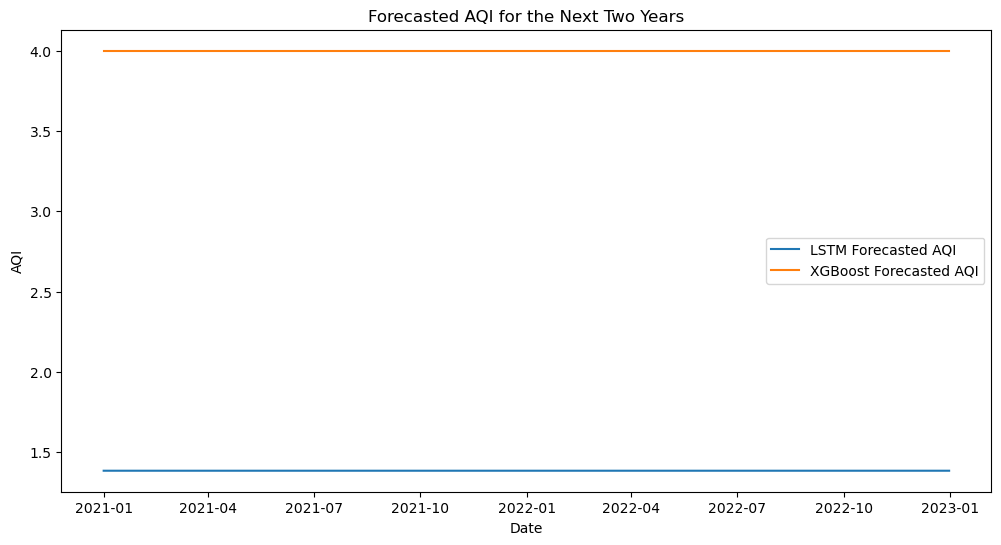

In [45]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your trained LSTM and XGBoost models
lstm_model = load_model('lstm_model.h5')
xgb_model = xgb.Booster()
xgb_model.load_model('xgboost_model.h5')

# Define the feature columns that were used for training the models
x_var = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Example function to simulate future pollutant data based on past data
def generate_future_pollutant_data(past_data, periods=730):  # 730 days for 2 years
    future_data = past_data.iloc[-1:].copy()
    future_data = pd.concat([future_data] * periods, ignore_index=True)
    return future_data

# Generate or load future pollutant data
future_pollutant_data = generate_future_pollutant_data(city_pollutant_data)

# Select only the required features for prediction
future_pollutant_data = future_pollutant_data[x_var]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(city_pollutant_data[x_var])  # Fit only on the 9 features used for training
future_data_scaled = scaler.transform(future_pollutant_data)

# Reshape future data for LSTM
future_data_scaled_lstm = np.array(future_data_scaled).reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

# Forecast AQI with LSTM
def forecast_aqi_with_lstm(future_data):
    lstm_forecast = lstm_model.predict(future_data)
    return lstm_forecast

# Forecast AQI with XGBoost
def forecast_aqi_with_xgboost(future_data):
    dmatrix = xgb.DMatrix(future_data, feature_names=x_var)
    xgb_forecast = xgb_model.predict(dmatrix)
    return xgb_forecast

# Run forecasts
lstm_predictions = forecast_aqi_with_lstm(future_data_scaled_lstm)
xgb_predictions = forecast_aqi_with_xgboost(future_data_scaled)

# Combine and analyze the predictions
predictions_df = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', periods=len(lstm_predictions), freq='D'),
    'LSTM_AQI': lstm_predictions.flatten(),
    'XGBoost_AQI': xgb_predictions
})

# Visualize the forecasted AQI for both models
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Date'], predictions_df['LSTM_AQI'], label='LSTM Forecasted AQI')
plt.plot(predictions_df['Date'], predictions_df['XGBoost_AQI'], label='XGBoost Forecasted AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Forecasted AQI for the Next Two Years')
plt.legend()
plt.show()


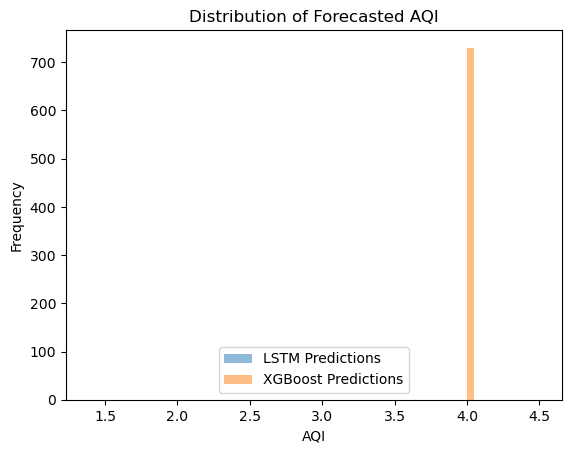

In [46]:
plt.hist(lstm_predictions.flatten(), bins=20, alpha=0.5, label='LSTM Predictions')
plt.hist(xgb_predictions, bins=20, alpha=0.5, label='XGBoost Predictions')
plt.legend()
plt.title('Distribution of Forecasted AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


### EDA

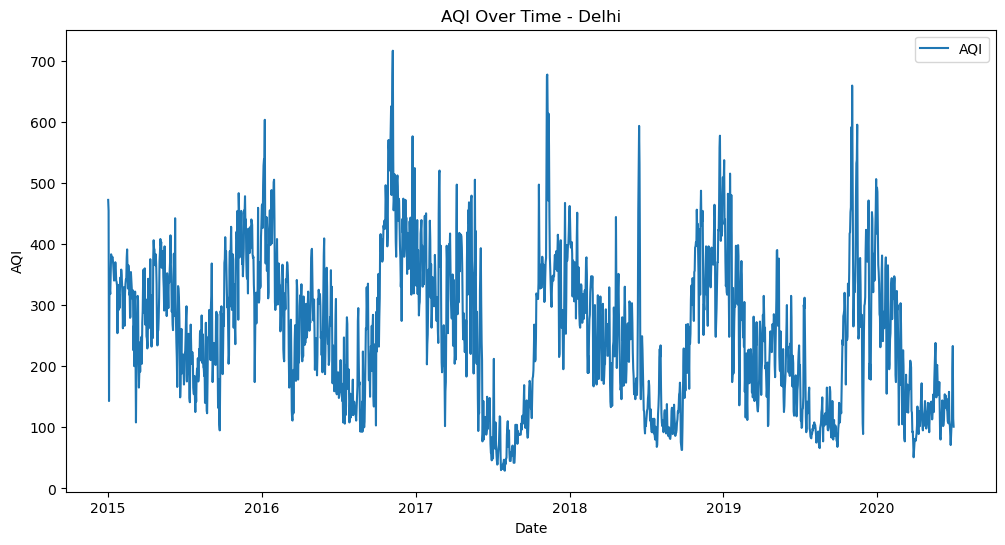

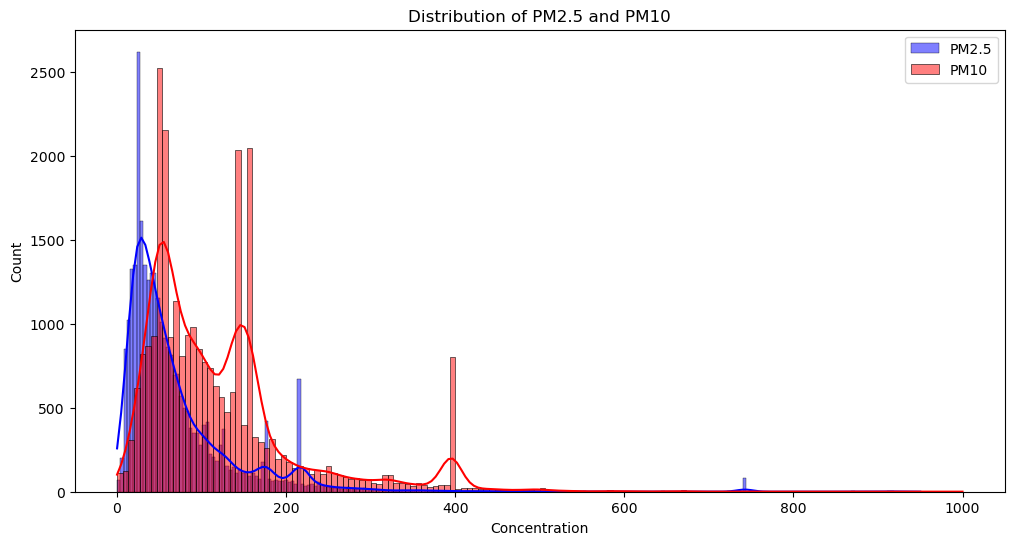

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot AQI over time for a specific city (e.g., 'Delhi')
city_data = data[data['City'] == 'Delhi']

plt.figure(figsize=(12, 6))
plt.plot(city_data['Date'], city_data['AQI'], label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Over Time - Delhi')
plt.legend()
plt.show()

# Distribution of PM2.5 and PM10 levels
plt.figure(figsize=(12, 6))
sns.histplot(data['PM2.5'].dropna(), kde=True, color='blue', label='PM2.5')
sns.histplot(data['PM10'].dropna(), kde=True, color='red', label='PM10')
plt.xlabel('Concentration')
plt.title('Distribution of PM2.5 and PM10')
plt.legend()
plt.show()


### Feature Engineering

In [11]:
# Extract date-related features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Adding rolling mean and std for pollutant levels
for col in pollutant_columns:
    data[f'{col}_7d_avg'] = data.groupby('City')[col].transform(lambda x: x.rolling(window=7).mean())
    data[f'{col}_30d_avg'] = data.groupby('City')[col].transform(lambda x: x.rolling(window=30).mean())


### ARIMA Model

In [13]:
# pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 4.8 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.9 MB 5.4 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 5.6 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 4.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 5.4 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.6 MB/s eta 0:00:00
Note: you may need to rest

    black (==22.3.0.) ; extra == 'dev'
          ~~~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\vibho\anaconda3\envs\VB\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vibho\anaconda3\envs\VB\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vibho\anaconda3\envs\VB\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vibho\anaconda3\envs\VB\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index i

ARIMA Model RMSE: 114.03482718621045


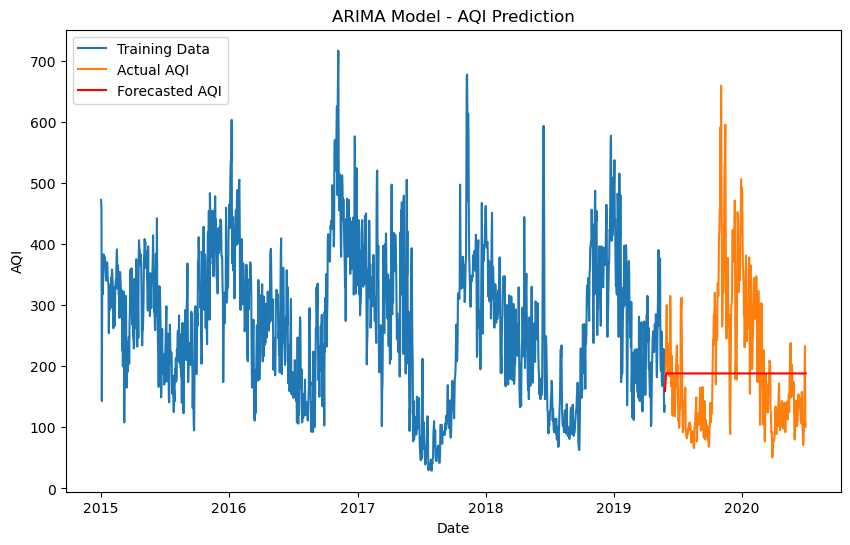

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Filtering data for one city for time series analysis
city_data = data[data['City'] == 'Delhi'].dropna(subset=['AQI'])

# Split data into training and test sets
train_size = int(len(city_data) * 0.8)
train, test = city_data['AQI'][:train_size], city_data['AQI'][train_size:]

# Define ARIMA model
p, d, q = 5, 1, 2
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Forecasting
forecast = arima_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'ARIMA Model RMSE: {rmse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(city_data['Date'][:train_size], train, label="Training Data")
plt.plot(city_data['Date'][train_size:], test, label="Actual AQI")
plt.plot(city_data['Date'][train_size:], forecast, color='red', label="Forecasted AQI")
plt.title('ARIMA Model - AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()


### LSTM Model

Epoch 1/20
50/50 [==============================] - 5s 37ms/step - loss: 0.0280 - val_loss: 0.0119
Epoch 2/20
50/50 [==============================] - 1s 21ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 3/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 4/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 5/20
50/50 [==============================] - 1s 21ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 6/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 7/20
50/50 [==============================] - 1s 21ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 8/20
50/50 [==============================] - 1s 22ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 9/20
50/50 [==============================] - 1s 23ms/step - loss: 0.0082 - val_loss: 0.0072
Epoch 10/20
50/50 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 11/

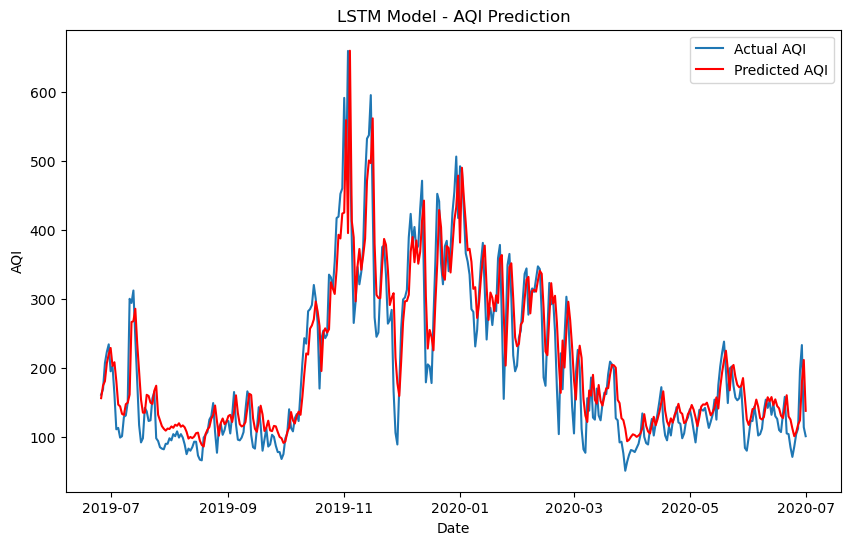

In [15]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Filter and prepare data
city_data = data[data['City'] == 'Delhi'].dropna(subset=['AQI'])
city_data.set_index('Date', inplace=True)
aqi_values = city_data[['AQI']].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_values)

# Prepare training and test sets
train_size = int(len(aqi_scaled) * 0.8)
train, test = aqi_scaled[:train_size], aqi_scaled[train_size:]

# Convert data to sequences
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict and inverse scale
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'LSTM Model RMSE: {rmse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(city_data.index[train_size + seq_length:], y_test, label="Actual AQI")
plt.plot(city_data.index[train_size + seq_length:], predictions, color='red', label="Predicted AQI")
plt.title('LSTM Model - AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()
